In [4]:
using SymPy

y = SymFunction("y")
x = Sym("x")

display(y) , display(x)

y


x

(nothing,nothing)

In [2]:
edo1 = y'(x) + x

    d       
x + --(y(x))
    dx      

In [7]:
edo2 = y''(x)*2 + y'(x)*5+20*y(x) - 10*exp(x^2)

              / 2\                    2      
              \x /     d             d       
20*y(x) - 10*e     + 5*--(y(x)) + 2*---(y(x))
                       dx             2      
                                    dx       

In [5]:
edo2 = y''(x)*2 + y'(x)*5+20*y(x)

                           2      
            d             d       
20*y(x) + 5*--(y(x)) + 2*---(y(x))
            dx             2      
                         dx       

In [6]:
sol_simb_ord2 = dsolve(edo2, x, (y, 0, 1), (y', 0, 0))

                 /    ____  \                  
         ____    |3*\/ 15 *x|                  
       \/ 15 *sin|----------|      /    ____  \
                 \    4     /      |3*\/ 15 *x|
       ---------------------- + cos|----------|
                 9                 \    4     /
y(x) = ----------------------------------------
                           5/4                 
                       / x\                    
                       \e /                    

In [ ]:
sol_simb_ord2 = dsolve(edo2)

In [2]:
function bernstein(x,n)
    B = zeros(length(x),n+1)
    B[:,1] = 1
    for k = 2:n+1
        B[:,k] = x.*B[:,k-1]
        for j =k-1:-1:2
            B[:,j] = x.*B[:,j-1] + (1-x).*B[:,j]
        end
        B[:,1] = (1-x).*B[:,1]
    end
    return B
end

bernstein (generic function with 1 method)

In [19]:
function plotP(x)
    
    A = 0
    #for j = 1:2
    
        for n = 1:15#[1:50 ; 49:-1:2]
        
            A = (PyPlot.plot(x,bernstein(x,n)))
        PyPlot.hold(false)       
        
        #end
    
     end
    display(A)
    PyPlot.hold(false)
end

plotP (generic function with 1 method)

16-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23c3d9d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a3d650>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a3d890>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a3da50>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a3dc10>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a3ddd0>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a3df90>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23ca11d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a49350>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a49510>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a496d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a49890>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a49a50>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a49c10>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a49dd0>
 PyObject <matplotlib.lines.Line2D object at 0x7f2b23a49f90>

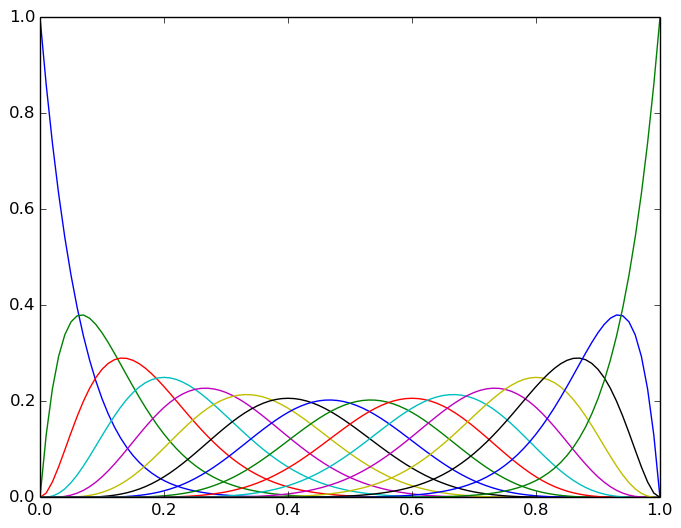

In [20]:
using PyPlot
plotP(0:0.01:1)

In [21]:
function plotW(n)
    x = 0:1/100:1
    A = 0
        
        for grau = 1:n
        
          A =  ((Winston.plot(x,bernstein(x,grau))))
        Winston.hold(false) 
        display(A)          
           
     end
    display(A)
    Winston.hold(false)
end

plotW (generic function with 1 method)

In [22]:
using Winston

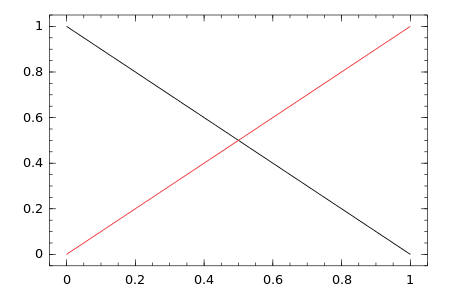

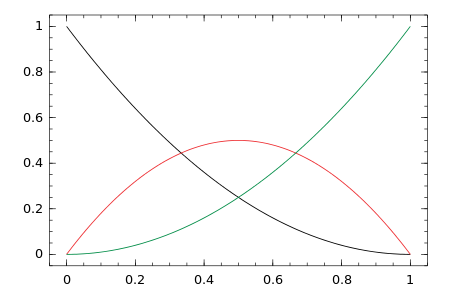

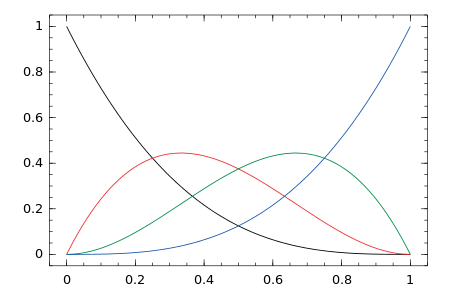

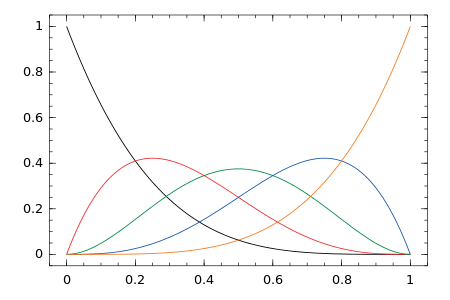

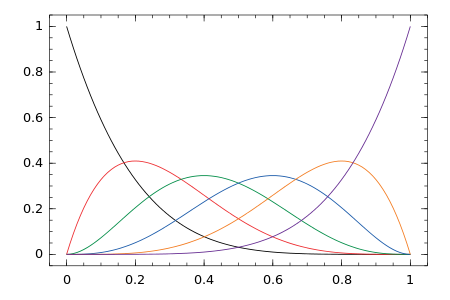

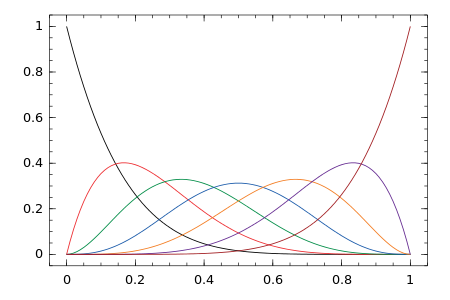

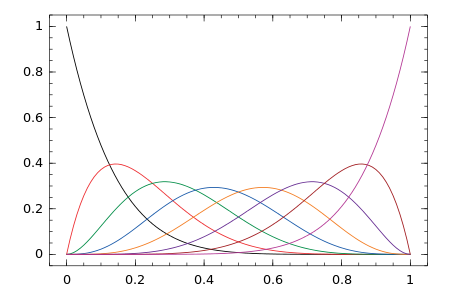

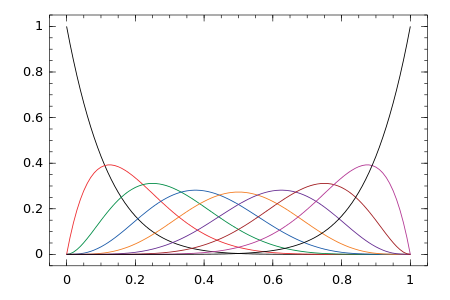

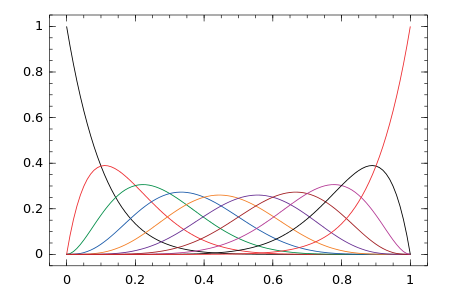

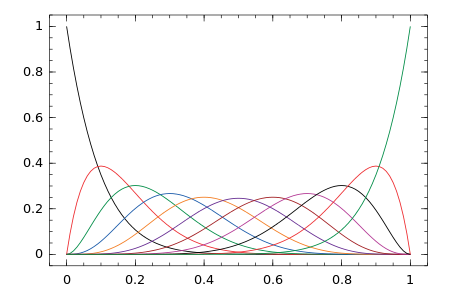

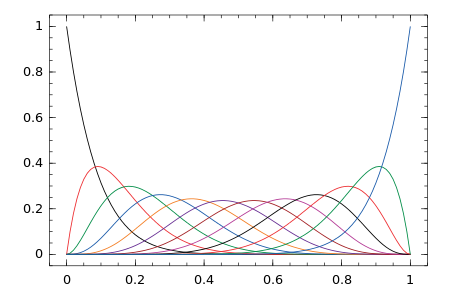

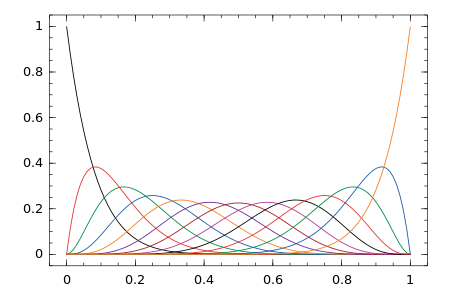

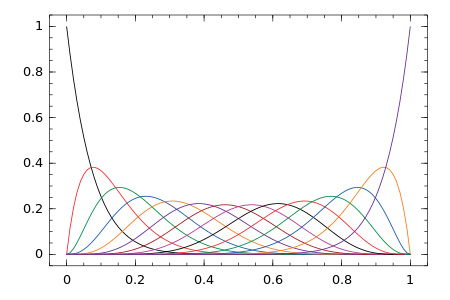

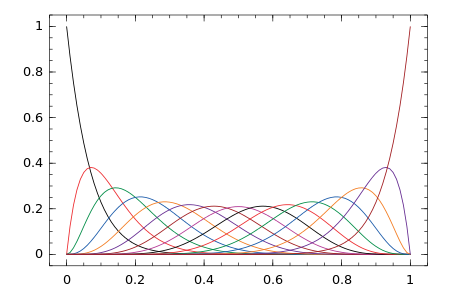

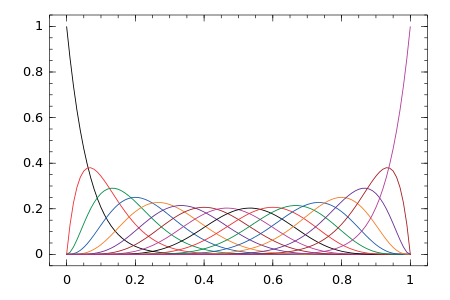

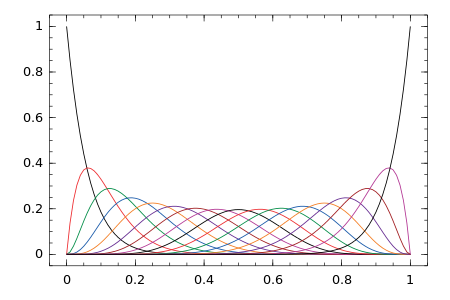

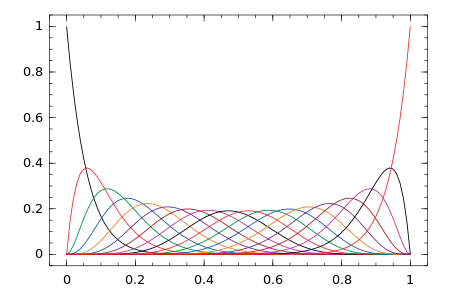

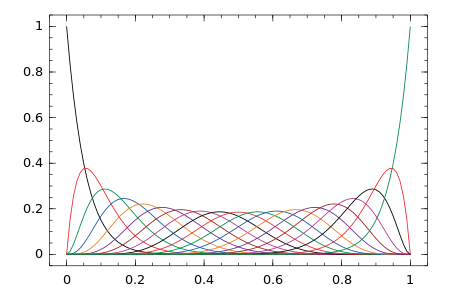

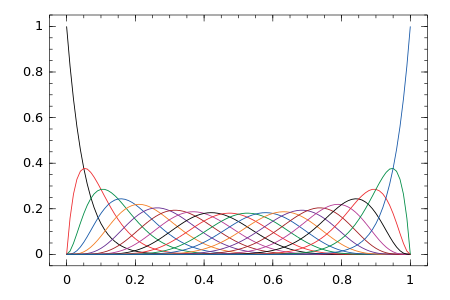

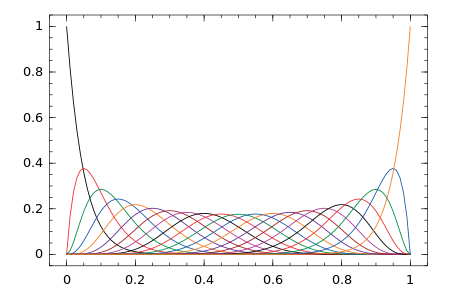

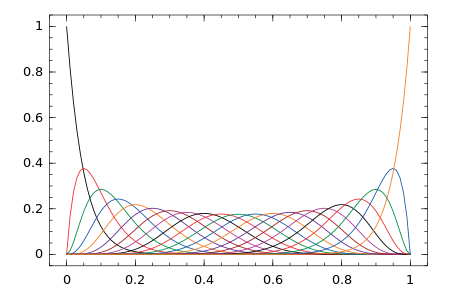

  0.441060 seconds (787.50 k allocations: 50.922 MB, 2.90% gc time)


In [23]:
@time plotW(20);

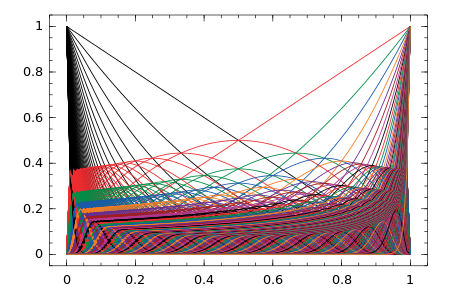

  1.515548 seconds (5.96 M allocations: 1.075 GB, 13.96% gc time)


In [39]:
@time plotW(100);

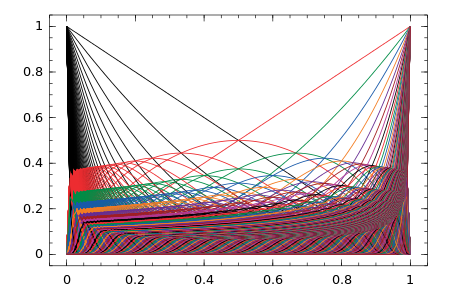

  3.756065 seconds (17.64 M allocations: 3.451 GB, 14.91% gc time)


In [38]:
@time plotW(150);

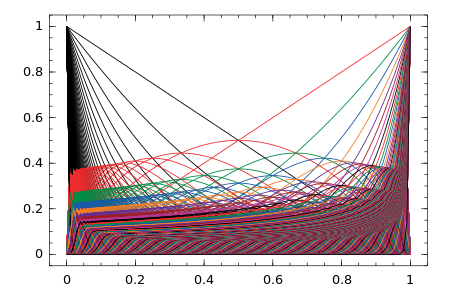

  7.729374 seconds (38.96 M allocations: 7.976 GB, 16.89% gc time)


In [41]:
@time plotW(200);

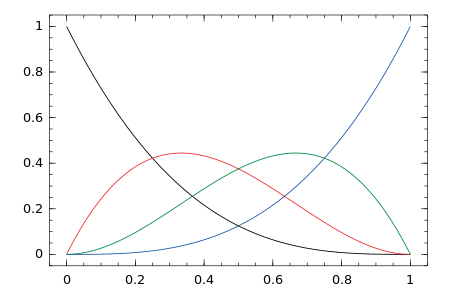

In [230]:
Winston.hold(false)
Winston.plot(x,bernstein(x,3))

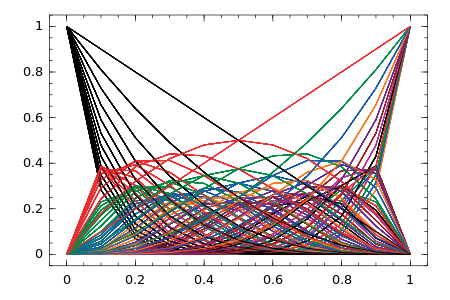

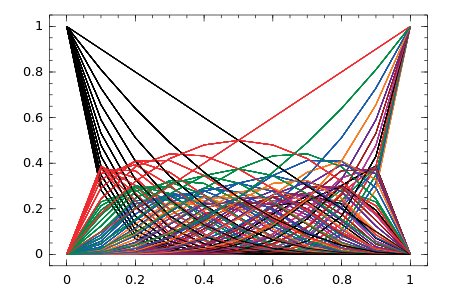

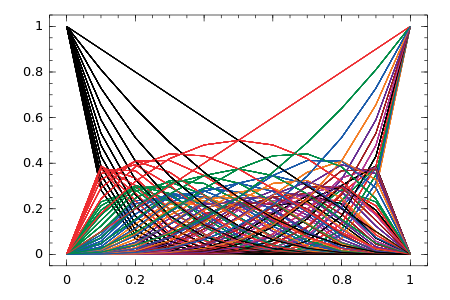

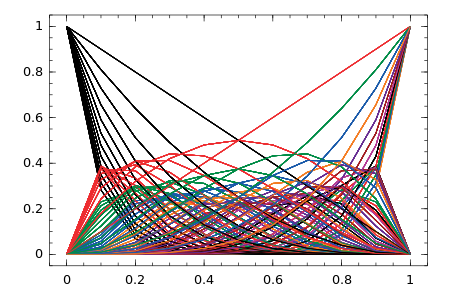

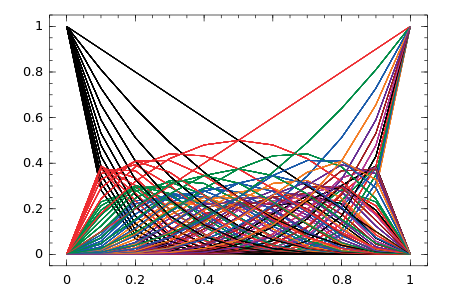

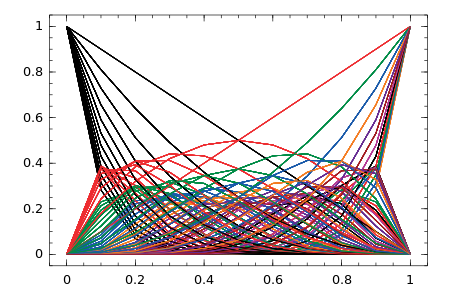

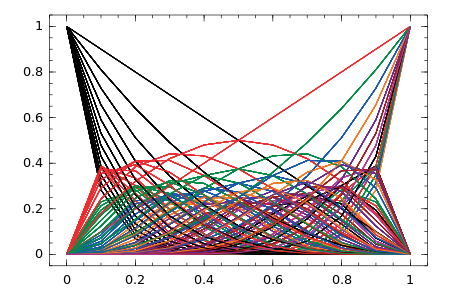

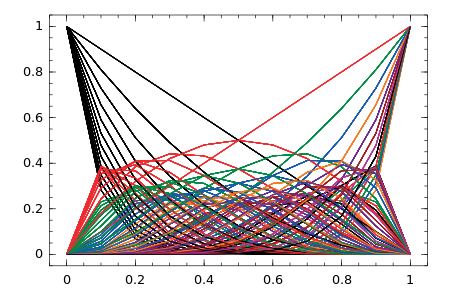

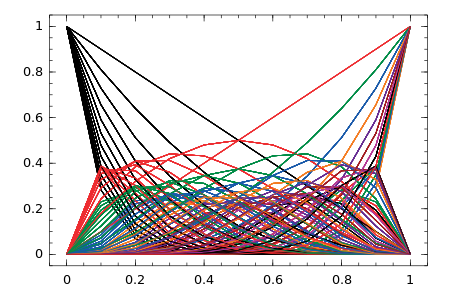

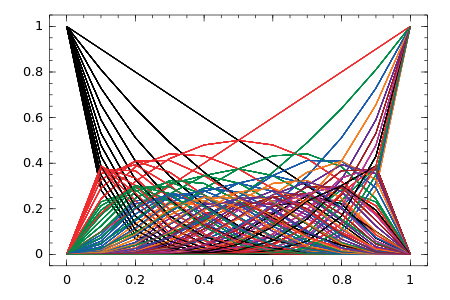

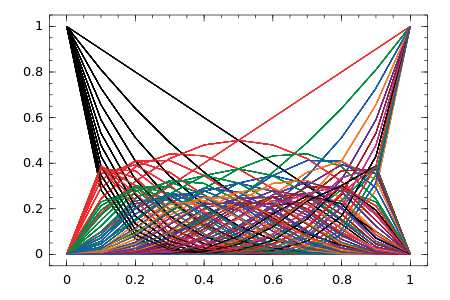

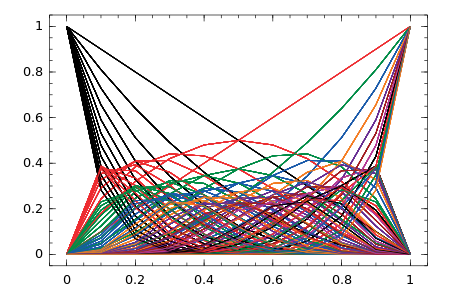

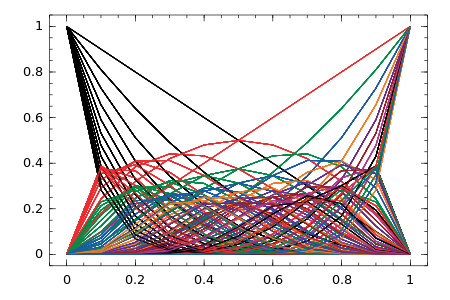

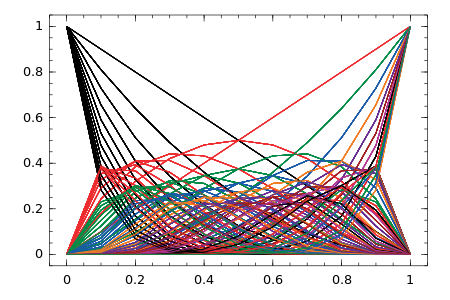

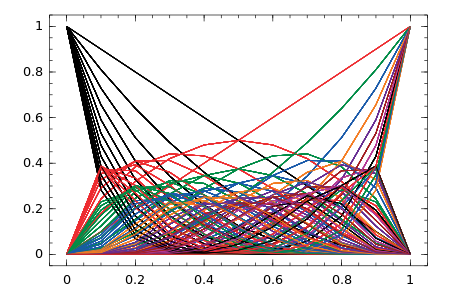

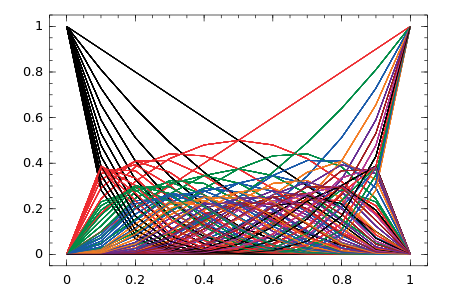

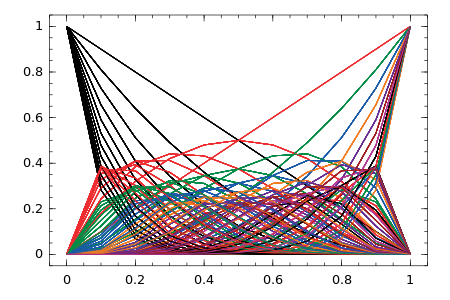

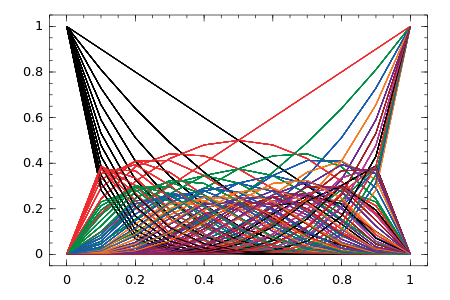

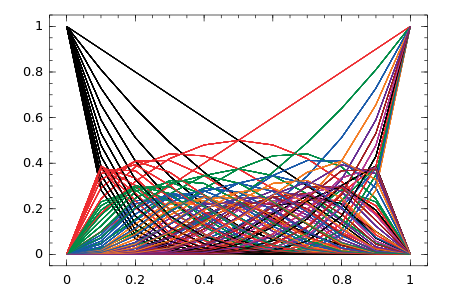

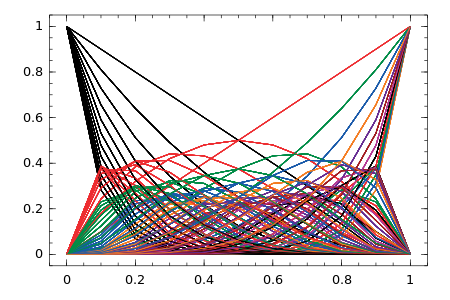

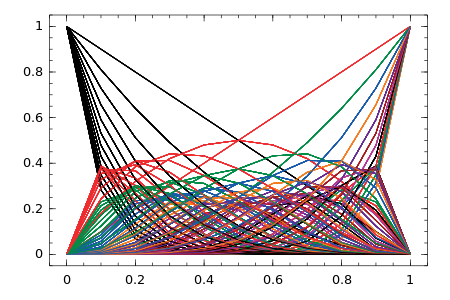

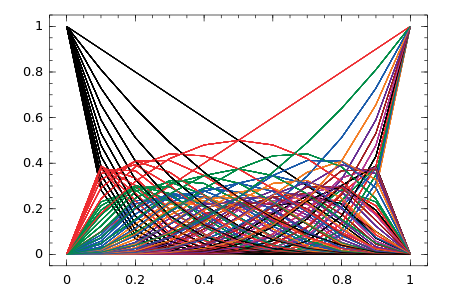

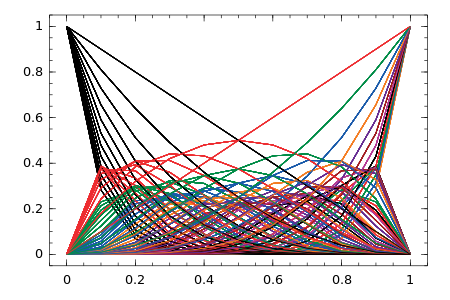

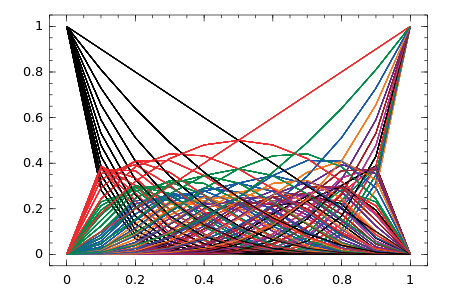

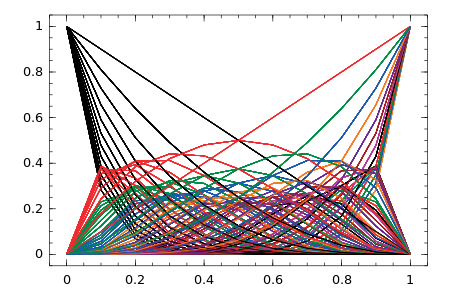

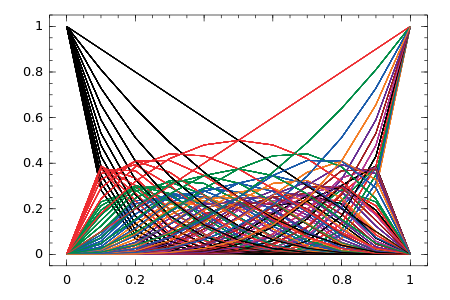

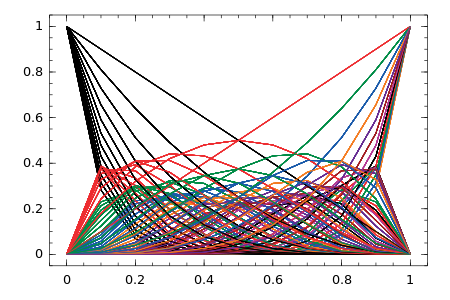

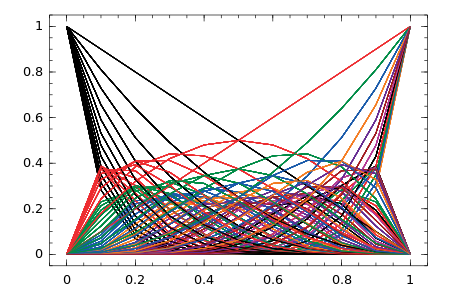

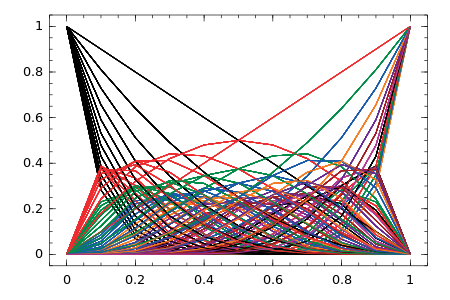

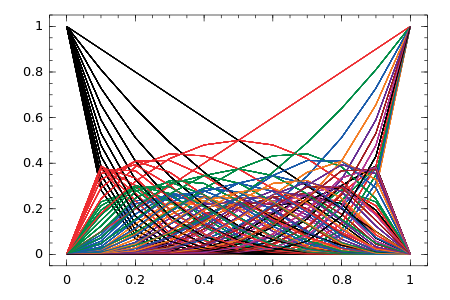

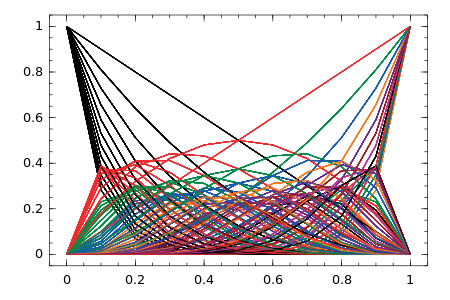

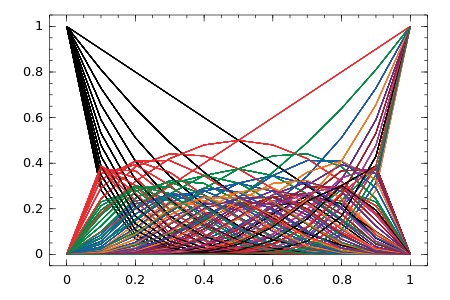

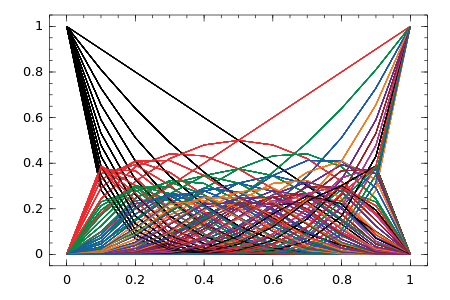

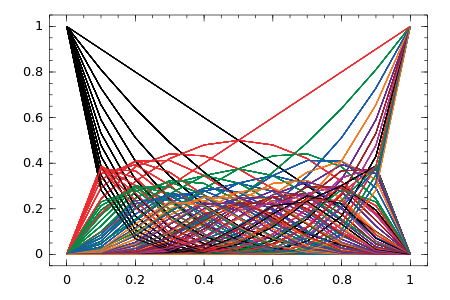

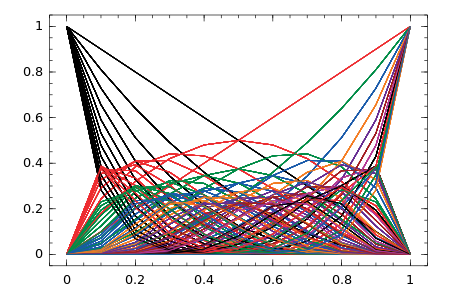

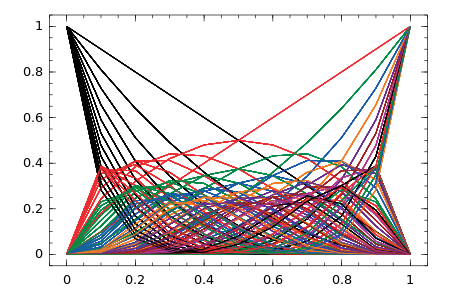

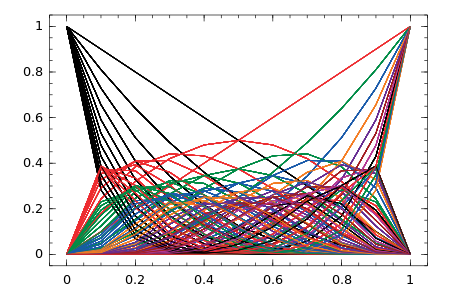

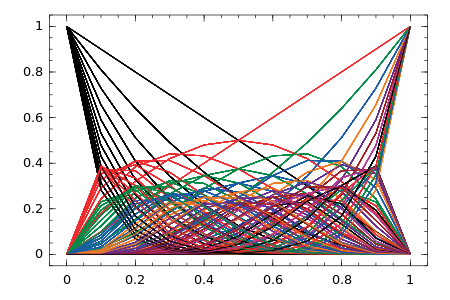

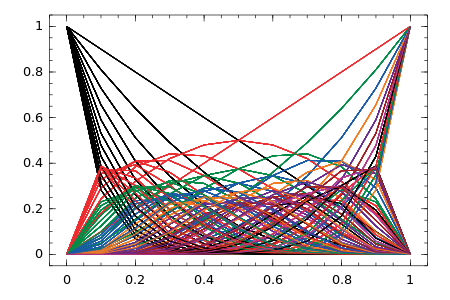

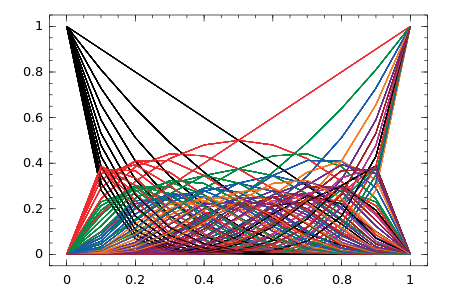

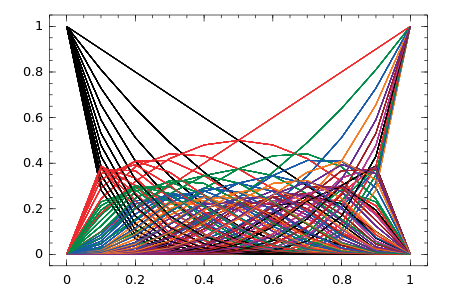

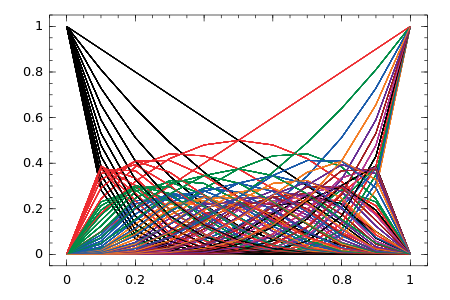

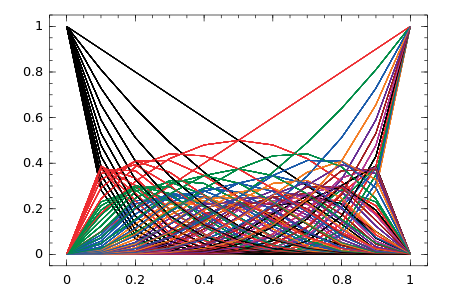

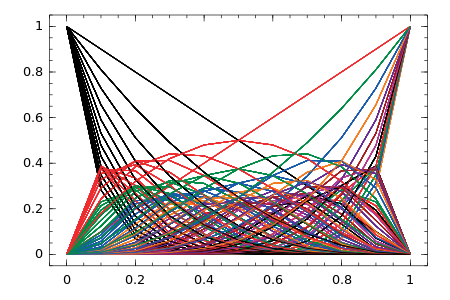

0

4.275823 seconds (4.63 M allocations: 276.769 MB, 1.36% gc time)


In [192]:
@time plotW(collect(0:1/10:1),bernstein(x,2))

In [43]:
using PyPlot
using Winston

x = collect(0:1/250:1)
b = bernstein(x,0);

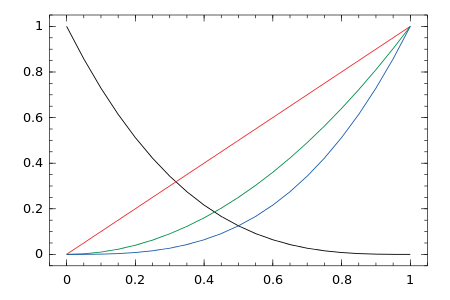

In [68]:
Winston.hold(false)
(Winston.plot(x,bernstein(x,3)))

In [53]:
@time  plotP(collect(0:1/1000:1))

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3b4fe7aed0>
 PyObject <matplotlib.lines.Line2D object at 0x7f3b4fe0e350>
 PyObject <matplotlib.lines.Line2D object at 0x7f3b4fe0e510>

  7.443324 seconds (2.62 M allocations: 3.942 GB, 5.66% gc time)


In [86]:
@time plotW(collect(0:1/10:1),b);

LoadError: LoadError: error compiling plotW: syntax: prefix "$" in non-quoted expression
while loading In[86], in expression starting on line 155

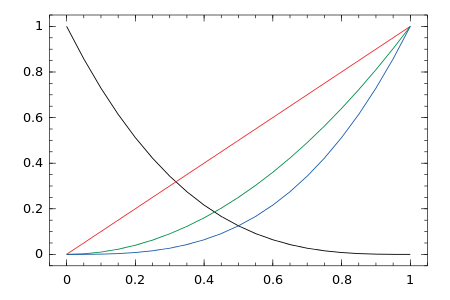

In [44]:
x = collect(0:1/20:1)
Winston.plot(x,bernstein(x,3))

In [2]:
function numquad(lb,ub,npoints)
  val = 0.0
  for x=lb:(ub-lb)/npoints:ub
    val += sin(x)/npoints
  end
  val
end

numquad (generic function with 1 method)

In [8]:
@time numquad(0,1000,100000000)

0.0004376250581042012

2.347414 seconds (5 allocations: 176 bytes)


In [1]:
# Linpack benchmark in Octave / Matlab
#
# MJ Rutter Nov 2015

N=5000;

print("Linpack %dx%d\n",N,N);

ops=2*N*N*N/3+2*N*N;
eps=2.2e-16;

A=rand(N,N)-0.5;

norma=maximum([maximum(maximum(A)), -minimum(minimum(A))]);

B=sum(A , 2);



X=A\B;





R=A*X-B;

normx=maximum([maximum(X),-minimum(X)]);
resid=maximum([maximum(R),-minimum(R)]);

residn=resid/(N*norma*normx*eps);

Linpack %dx%d
50005000

In [22]:
A=rand(N,N)-0.5
maximum(A)

0.4999994481997063

In [25]:
(x->x+1)

(anonymous function)

In [38]:
x = 1:0.0000001:5

1.0:1.0e-7:5.0

In [36]:
FloatRange(x)

1.0:1.0e-6:10.0

In [39]:
length(x)

40000001

In [42]:
x[1028]

1.0001027

In [1]:
?fft

search: 

```
fft(A [, dims])
```

Performs a multidimensional FFT of the array `A`.  The optional `dims` argument specifies an iterable subset of dimensions (e.g. an integer, range, tuple, or array) to transform along.  Most efficient if the size of `A` along the transformed dimensions is a product of small primes; see `nextprod()`.  See also `plan_fft()` for even greater efficiency.

A one-dimensional FFT computes the one-dimensional discrete Fourier transform (DFT) as defined by

$\operatorname{DFT}(A)[k] =
  \sum_{n=1}^{\operatorname{length}(A)}
  \exp\left(-i\frac{2\pi
  (n-1)(k-1)}{\operatorname{length}(A)} \right) A[n].$
A multidimensional FFT simply performs this operation along each transformed dimension of `A`.

Higher performance is usually possible with multi-threading. Use `FFTW.set_num_threads(np)` to use `np` threads, if you have `np` processors.


fft fft! FFTW fftshift rfft ifft bfft ifft! bfft! ifftshift irfft brfft



In [1]:
x = collect(-2*pi:0.0000001:2*pi)
fftx = sin(2*x) + 2*sin(5*x);
print("ok")

ok

In [ ]:
F = fft(fftx);

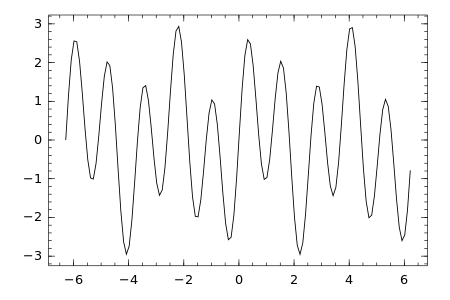

In [16]:
using Winston
plot(x,fftx)

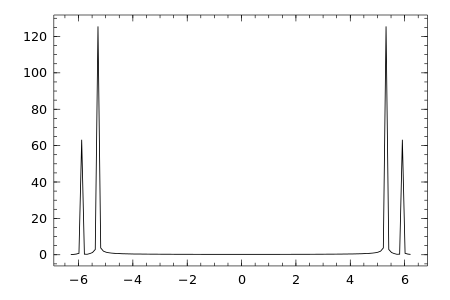

In [17]:
plot(x,abs(F))

In [71]:
import PyPlot

In [ ]:
% LagrangeINT fits a Lagrange polynomial to a set of given points and
% uses the polynomial to determines the interpolated value of a point.
% Input variables:
% x  A vector with the x coordinates of the given points.
% y  A vector with the y coordinates of the given points.
% Xint  The x coordinate of the point to be interpolated.
% Output variable:
% Yint  The interpolated value of Xint.


In [74]:
function lg(X,Y,Xint)
   
    n = length(X)
    L = (ones(n))
    BigFloat64(Y)
    BigFloat(X)
    for k = 1:n        
        L[k] = 1
        for c = 1:n       
            if c!=k
                L[k] = convert(BigFloat,((L[k]*( Xint - X[c] ))/( X[k] - X[c] )))
            end
        end        
    end
    convert(BigFloat,(Y))
    return sum((Y.*L))
end

lg (generic function with 1 method)

In [75]:
x = collect(0:0.001:5)
y = x.^2 + 2.*x + rand();

In [76]:
lg(x,y,(2.1))

LoadError: LoadError: UndefVarError: BigFloat64 not defined
while loading In[76], in expression starting on line 1

In [77]:
lg(x,y,2.0001)

LoadError: LoadError: UndefVarError: BigFloat64 not defined
while loading In[77], in expression starting on line 1

In [80]:
?convert

search: 

```rst
..  convert(T, x)

Convert ``x`` to a value of type ``T``.

If ``T`` is an ``Integer`` type, an :exc:`InexactError` will be raised if
``x`` is not representable by ``T``, for example if ``x`` is not
integer-valued, or is outside the range supported by ``T``.

.. doctest::

   julia> convert(Int, 3.0)
   3

   julia> convert(Int, 3.5)
   ERROR: InexactError()
    in convert at int.jl:209

If ``T`` is a :obj:`AbstractFloat` or :obj:`Rational` type, then it will return
the closest value to ``x`` representable by ``T``.

.. doctest::

   julia> x = 1/3
   0.3333333333333333

   julia> convert(Float32, x)
   0.33333334f0

   julia> convert(Rational{Int32}, x)
   1//3

   julia> convert(Rational{Int64}, x)
   6004799503160661//18014398509481984
```


convert code_native @code_native



In [98]:
ones(1:5)

5-element Array{Int64,1}:
 1
 1
 1
 1
 1

In [10]:
 A = zeros(length(x),2+1)

21x3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [44]:
function polyfit(x, y, n)
    A = zeros(length(x),n+1)
    
    for p = 0:n
        for i = 1:length(x)
            A[i,p+1] = float(x[i])^p
        end
    end
    A \ y
end 

polyfit (generic function with 1 method)

In [88]:
x = 0:0.0000001:1
y = ones(length(x))
for i = 1:length(x)
    
    y[i] = x[i]^5 + x[i]^4 + x[i]^3+ x[i]^2 + x[i] + rand()/5
   
end

In [90]:
# vetor x
#vetor y
# grau polinomio 

@time a = polyfit(x, y, 5 )

6-element Array{Float64,1}:
 0.0998669
 1.00305  
 0.978588 
 1.05768  
 0.934246 
 1.02685  

3.997923 seconds (119 allocations: 991.831 MB, 1.07% gc time)


In [80]:
fg(x) = a[6].*x.^5 + a[5].*x.^4 + a[4].*x.^3 + a[3].*x.^2 + a[2].*x + a[1]

fg (generic function with 1 method)

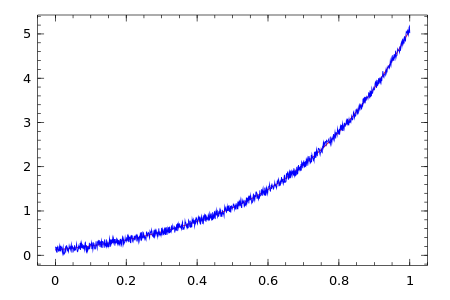

In [81]:
using Winston
plot(x, fg(x),"-r", x,y,"-b")

In [23]:
function polyfit1(x, y, n)
  A = [ float(x[i])^p for i = 1:length(x), p = 0:n ]
    
  A \ y
   
end

polyfit1 (generic function with 1 method)

In [24]:
polyfit1(x, y, 2)

3-element Array{Float64,1}:
 0.468131
 2.0     
 1.0     

In [ ]:
using Winston

In [1]:
function ajcmq(n)
    c = time()
    x = linspace(1,100,n)
    y = ones(length(x))
    a = ones(2,2)
    b = ones(2)
    for i = 1:length(x)
        y[i] = 0.074334/x[i] -0.059685*exp(-2*x[i]^2)/x[i] + rand()/100 ;
    end

    a[1,1] = sum(1./x.^2);
    a[1,2] = sum(exp(-2*x.^2)./x.^2);
    a[2,1] = a[1,2];
    a[2,2] = sum(exp(-4*x.^2)./x.^2);
    b[1,1] = sum(y./x);
    b[2,1] = sum((y.*exp(-2*x.^2))./x);
    AB = a\b
    xfit = x;
    yfit = AB[1]./xfit + AB[2]*exp(-2*xfit.^2)./xfit
    
    return AB
end

ajcmq (generic function with 1 method)

In [12]:
t = ones(30)
for i = 1:30
    t[i] = ajcmq(1000000)
end
   
display(maximum(t))
display(minimum(t))

0.3333268165588379

0.2792320251464844

In [38]:
 ajcmq(1000000)

0.31544995307922363

In [14]:
time() - time()

-9.5367431640625e-7

In [11]:
using Winston
bar(1:30,t)
mean(t)

0.31772603988647463

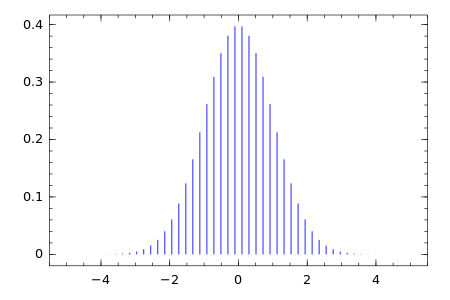

In [15]:
x = linspace(-5, 5, 50)
y = 1 / sqrt(2pi) * exp(-x.^2 / 2)

s = Stems(x, y, color="blue")
p = FramedPlot()
add(p, s)

In [16]:
using PyPlot

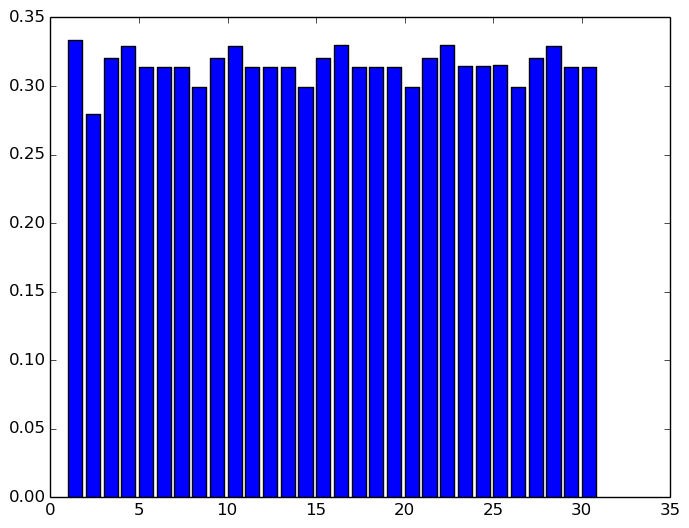

(PyObject <matplotlib.patches.Rectangle object at 0x7fec2f195c90>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f1a3350>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f1a39d0>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f1a3ed0>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f1b5710>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f1b5d90>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f142450>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f142ad0>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f142fd0>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f14d810>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f14de90>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f15b550>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f15bbd0>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f166290>,PyObject <matplotlib.patches.Rectangle object at 0x7fec2f166910>,PyObject <matplotlib.pat

In [21]:
PyPlot.bar(1:30,t)

In [3]:
Pkg.add("ODE")

INFO: Cloning cache of ODE from git://github.com/JuliaLang/ODE.jl.git
INFO: Installing ODE v0.2.1
INFO: Package database updated


In [46]:
using ODE
using PyPlot
using Winston

In [28]:
function f(t, y)
    mu = 2.5
    ydot = similar(y)
    ydot[1] = y[2]
    ydot[2] = mu*(1-y[1]^2)*y[2]-y[1];
    ydot;
end

f (generic function with 1 method)

In [141]:
t = collect(0:0.5:5)
y0 = [1.0, 3.0]

x,y=ODE.ode78(f, y0, t);

y1 = [ a[1] for a in y]; # Rearranging the output,
y2 = [ a[2] for a in y]; # more convenient
print("ok")

ok

In [145]:
similar([1 2 3])

1x3 Array{Int64,2}:
 32  0  0

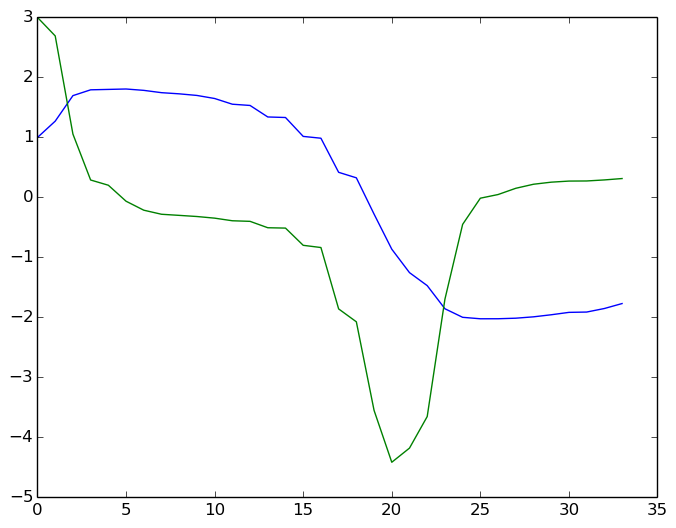

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1fbe68d1d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f1fbe68d450>

In [143]:
PyPlot.plot(y)

In [92]:
using ODE

In [115]:

tInt = collect(0:0.1:10)
    yInt = 3.0
t,y = ode23(func,tInt,yInt)
    



LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Array{Float64,1}}, ::Float64)
This may have arisen from a call to the constructor Array{Float64,1}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert{T}(::Type{Array{T,1}}, !Matched::Range{T})
  convert{T,S,N}(::Type{Array{T,N}}, !Matched::SubArray{S,N,P<:AbstractArray{T,N},I<:Tuple{Vararg{Union{AbstractArray{T,1},Colon,Int64}}},LD})
  ...
while loading In[115], in expression starting on line 4

In [3]:
using PyPlot

In [107]:
function func(x,y)
    dydx = -x*y
    dydx
end

func (generic function with 2 methods)

In [97]:
ode45M()

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Array{Float64,1}}, ::Float64)
This may have arisen from a call to the constructor Array{Float64,1}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert{T}(::Type{Array{T,1}}, !Matched::Range{T})
  convert{T,S,N}(::Type{Array{T,N}}, !Matched::SubArray{S,N,P<:AbstractArray{T,N},I<:Tuple{Vararg{Union{AbstractArray{T,1},Colon,Int64}}},LD})
  ...
while loading In[97], in expression starting on line 1

In [21]:
workspace()

In [75]:
using ODE

In [91]:
function ODE45_J(n)
        fc(x,y)= (-5.*x - y./5).^3/2 + 10
        tspan = 0:0.001:n
        y0 = [0.0, 1.0]
        ODE.ode45(fc, y0,tspan);
        
    end

    function teste_sEXP(n)

        resultado = ones(50);

        for i = 1:50
            resultado[i] = @elapsed ODE45_J(n);
        end

        print("tempo médio: ", mean(resultado));

    end

teste_sEXP (generic function with 1 method)

In [92]:
t5_ode45 = teste_sEXP(1000)

tempo médio: 1.3847858532200001

In [94]:
fc(x,y)= (-5.*x - y./5).^3/2 + 10
tspan = 0:0.001:10
y0 = [0.0, 1.0]
A = ODE.ode45(fc, y0,tspan);

([0.0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009  …  9.991,9.992,9.993,9.994,9.995,9.996,9.997,9.998,9.999,10.0],[[0.0,1.0],[0.01000002489490525,1.0099958099119015],[0.020000090964570248,1.0199912114713943],[0.030000185286418877,1.029986162414161],[0.04000029493787499,1.0399806204758848],[0.05000040699636248,1.0499745433922476],[0.060000508539305226,1.0599678888989326],[0.07000058664412707,1.069960614731622],[0.08000062838825192,1.079952678625999],[0.09000062084910362,1.0899440383177457]  …  [-229.16894167286765,-229.1688913967065],[-229.19393984782124,-229.19388982088373],[-229.21893802697537,-229.21888824868722],[-229.2439362102147,-229.24388668001737],[-229.2689343974239,-229.26888511477463],[-229.2939325884876,-229.2938835528594],[-229.3189307832904,-229.31888199417193],[-229.3439289817169,-229.34388043861267],[-229.36892718365186,-229.36887888608203],[-229.3939253889798,-229.39387733648036]])

In [95]:
A[2]

10032-element Array{Array{Float64,1},1}:
 [0.0,1.0]                                
 [0.01000002489490525,1.0099958099119015] 
 [0.020000090964570248,1.0199912114713943]
 [0.030000185286418877,1.029986162414161] 
 [0.04000029493787499,1.0399806204758848] 
 [0.05000040699636248,1.0499745433922476] 
 [0.060000508539305226,1.0599678888989326]
 [0.07000058664412707,1.069960614731622]  
 [0.08000062838825192,1.079952678625999]  
 [0.09000062084910362,1.0899440383177457] 
 [0.10000055110410609,1.0999346515425454] 
 [0.11000040623068315,1.10992447603608]   
 [0.1200001733062587,1.119913469534033]   
 ⋮                                        
 [-229.11894533602387,-229.11889455962952]
 [-229.14394350223014,-229.14389297625524]
 [-229.16894167286765,-229.1688913967065] 
 [-229.19393984782124,-229.19388982088373]
 [-229.21893802697537,-229.21888824868722]
 [-229.2439362102147,-229.24388668001737] 
 [-229.2689343974239,-229.26888511477463] 
 [-229.2939325884876,-229.2938835528594]  
 [-229.318930

In [104]:
using SymPy

y = SymFunction("y")
x = Sym("x")

display(y) , display(x)

y


x

(nothing,nothing)

In [106]:
edo1 = (-5*x - y(x)/5)^3/2 + 10 - y'(x)

             3                
/       y(x)\                 
|-5*x - ----|                 
\        5  /    d            
-------------- - --(y(x)) + 10
      2          dx           

In [108]:
print(SymPy.dsolve(edo1))

y(x) == x^4*(C1*(15000*C1 + 2499997)/15625000 + 999997*C1/625000 - 525)/24 + C1 + C1*x + 3*C1*x^2*(C1 - 35)/500 + C1*x^3*(2*C1 - 687275)/375000 + C1*x^5*(C1*(C1 + 687492) + C1*(C1*(-C1 + 17187276) - 4542491*C1/2500 + 5118750) - 4544891*C1/100 + 127968750)/187500000 + O(x^6)

In [96]:
s = SymPy.dsolve(edo1, x, (y, 1, 3))

          -2  2*x    
       5*e  *e      1
y(x) = ---------- + -
           2        2

In [97]:
Y = rhs(s) 

   -2  2*x    
5*e  *e      1
---------- + -
    2        2

In [98]:
float(Y(0))

0.8383382080915317

In [31]:
using Winston

In [40]:
ys = float(map(Y(x),collect(0:200)));

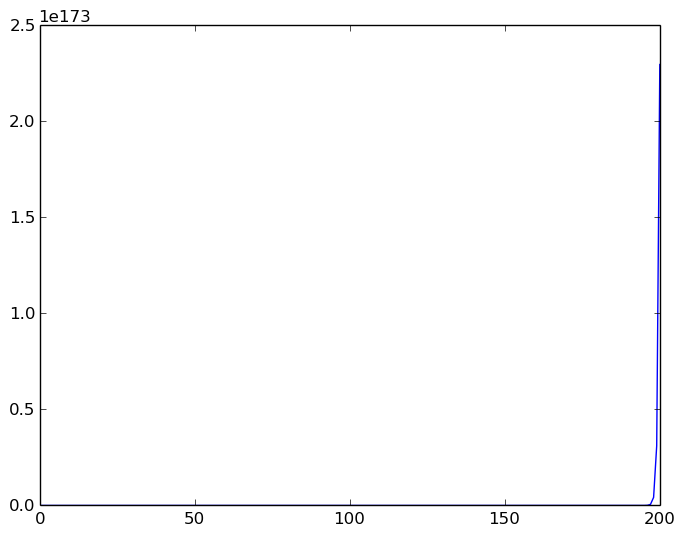

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fddb2325f90>

In [41]:
PyPlot.plot(collect(0:200),ys)

OK! ode abaixo ok

In [37]:
function ode45L(n)
    fan = ((x,y)->  x^7 + x^6 + x^5 + x^4 + x^3 + x^2 + x + x*y + y);
    
    tspan = linspace(0,1,n)
    
    F = ode45(fan,1.0,tspan)
    
    return F
end

ode45L (generic function with 1 method)

In [38]:
@time sol = ode45L(20);

  0.007299 seconds (1.94 k allocations: 70.351 KB)


In [63]:
pi

π = 3.1415926535897...

In [34]:
sol[1]

104-element Array{Float64,1}:
 0.0      
 0.0001   
 0.010101 
 0.020202 
 0.030303 
 0.040404 
 0.0505051
 0.0606061
 0.0707071
 0.0808081
 0.0909091
 0.10101  
 0.111111 
 ⋮        
 0.89899  
 0.909091 
 0.919192 
 0.922524 
 0.929293 
 0.939394 
 0.949495 
 0.959596 
 0.969697 
 0.979798 
 0.989899 
 1.0      

In [22]:
sort(rand(100,100))

LoadError: LoadError: MethodError: `sort` has no method matching sort(::Array{Float64,2})
Closest candidates are:
  sort(::AbstractArray{T,N}, !Matched::Integer)
while loading In[22], in expression starting on line 1

In [23]:
?sort

search: 

```
sort(A, dim, [alg=<algorithm>,] [by=<transform>,] [lt=<comparison>,] [rev=false])
```

Sort a multidimensional array `A` along the given dimension.

```
sort(v, [alg=<algorithm>,] [by=<transform>,] [lt=<comparison>,] [rev=false])
```

Variant of `sort!` that returns a sorted copy of `v` leaving `v` itself unmodified.


sort sort! sortrows sortperm sortcols sortperm! Cshort issorted



In [54]:
Array(Complex, 2,2)


2x2 Array{Complex{T<:Real},2}:
 #undef  #undef
 #undef  #undef

In [42]:
sort(A,2)

5x5 Array{Float64,2}:
 0.011241   0.658969  0.766904  0.950547  0.981972
 0.264262   0.478388  0.520337  0.53961   0.975054
 0.0786109  0.437163  0.683941  0.760063  0.872246
 0.167348   0.203801  0.212293  0.223967  0.895687
 0.279565   0.477437  0.501218  0.852269  0.982996

In [2]:
function mcmc(x,N)
f(x) = exp(sin(x[1]*5) - x[1]^2 - x[2]^2);
p = f(x);
for n=1:N
  x2 = x + .01*randn(size(x));
  p2 = f(x2);
  if rand() < p2/p
    x = x2;
    p = p2;
  end
end
end

mcmc (generic function with 1 method)

In [6]:
@time mcmc(collect(1:0.001:100),500)

  0.823939 seconds (6.66 k allocations: 1.107 GB, 5.43% gc time)


In [10]:
function bernstein(x,n)
    B = zeros(length(x),n+1)
    B[:,1] = 1.0
    for k = 2:n+1
        B[:,k] = x.*B[:,k-1]
        for j = k-1:-1:2
            B[:,j] = x.*B[:,j-1] + (1-x).*B[:,j]
        end
        B[:,1] = (1-x).*B[:,1]
    end
    return B
end

function plotW(n)
    x = 0:1/100:1
    A = 0        
        for grau = 1:n        
          A =  ((Winston.plot(x,bernstein(x,grau))));
          Winston.hold(true)         
         end
    
    display(A)
    Winston.hold(false)
end

plotW (generic function with 1 method)

In [11]:
function teste_figB(n)
    
    resultado = ones(50)
    
    for i = 1:50
        resultado[i] = @elapsed plotW(n);
    end
    
    print("tempo médio: ", mean(resultado))
    
end

teste_figB (generic function with 1 method)

In [7]:
using Winston


t3_fB = teste_figB(20);

tempo médio: 0.03136124342

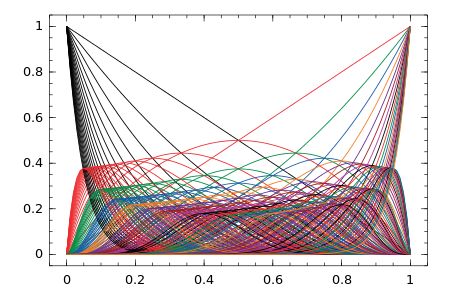

0.097693795

In [14]:
@elapsed plotW(20)

In [15]:
function randmatstat(t)
    n = 5
    v = zeros(t)
    w = zeros(t)
    for i=1:t
        a = randn(n,n)
        b = randn(n,n)
        c = randn(n,n)
        d = randn(n,n)
        P = [a b c d]
        Q = [a b; c d]
        v[i] = trace((P.'*P)^4)
        w[i] = trace((Q.'*Q)^4)
    end
    return (std(v)/mean(v), std(w)/mean(w))
end

randmatstat (generic function with 1 method)

In [23]:
@time randmatstat(100000)

(0.7284324339468866,0.7568305191664078)

1.543904 seconds (3.10 M allocations: 1.518 GB, 6.19% gc time)


In [24]:
?trace

search: 

```
trace(M)
```

Matrix trace


trace backtrace AbstractVector AbstractVecOrMat isinteractive



In [25]:
a = randn(5,5)

5x5 Array{Float64,2}:
  0.638119  -0.309738  -0.23297    -0.507585  -0.669321
 -0.862785  -0.662633   0.0808834  -0.162277  -1.54931 
  1.43211    0.597039  -0.966296   -0.452955  -0.768893
 -0.800915  -2.41299   -0.0447399   0.716688   0.967652
  1.91939   -0.621321  -1.35804     1.27815    1.11288 

In [27]:
std(a)/mean(a)

-7.036608227707264